In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
import seaborn as sns
%matplotlib inline

In [2]:
import tweepy

In [3]:
consumer_key = "VqcxzBOXycA5eSY4DVh8gdbcN"
consumer_secret = "kLkViKhCJ9VaXAeuvNr2bEBgC5pcYDOi5lwh5vXuTtc0bpL9L7"
access_token = "400927565-O9z7W7ucgL7esDLkRg2e4JSTfiNSTixqlf2tmC7i"
access_token_secret = "Oe2ohU0flKGf1HUn0ZkVTXmJ2tA3IgXCjkyFgo9x75imF"

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
#creating the API object while passing in auth information
api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
tweets = api.search("@emiratessupport" "-filter:retweets", count=100, lang='en',rpp=100)

In [8]:
tweets

[Status(_api=<tweepy.api.API object at 0x11c25af60>, _json={'created_at': 'Sun May 12 03:26:05 +0000 2019', 'id': 1127414614512345088, 'id_str': '1127414614512345088', 'text': '@EmiratesSupport   intend to sponsor any club in Brazil?', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'EmiratesSupport', 'name': 'Emirates Support', 'id': 879662622, 'id_str': '879662622', 'indices': [0, 16]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': 879662622, 'in_reply_to_user_id_str': '879662622', 'in_reply_to_screen_name': 'EmiratesSupport', 'user': {'id': 815986615785025538, 'id_str': '815986615785025538', 'name': 'Alan Fernandes', 'screen_name': 'Alanziitoooo', 'location': 'Porto Velho, Brasil', 'description': '', 'url': None, 'en

Each element in this list is a TWEET OBJECT from Tweepy.

In [9]:
from IPython.display import display

In [10]:
#Create a DataFrame
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns = ['Tweets'])

#we display the first 10 elements of the dataframe
data.head(10)

,Tweets
0,@EmiratesSupport intend to sponsor any club ...
1,@EmiratesSupport Done x
2,@EmiratesSupport Am humbled and Honoured big t...
3,@EmiratesSupport \nCan I accumulate JAL miles?
4,@EmiratesFACup @EmiratesSupport hello guys. I'...
5,"@EmiratesSupport i just paid ticket , but I di..."
6,@EmiratesSupport Finally I have reached but my...
7,@EmiratesSupport This doesn't work when I use ...
8,"It’s not even about the delay, poor informatio..."
9,@EmiratesSupport Can’t wait for the return tri...


Directory to display the INTERNAL METHODS that the tweet structure has in Tweepy

In [11]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [12]:
#print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1127414614512345088
2019-05-12 03:26:05
Twitter for Android
0
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'EmiratesSupport', 'name': 'Emirates Support', 'id': 879662622, 'id_str': '879662622', 'indices': [0, 16]}], 'urls': []}


In [13]:
pd.set_option('display.max_colwidth', -1)

In [14]:
data.head(10)

,Tweets
0,@EmiratesSupport intend to sponsor any club in Brazil?
1,@EmiratesSupport Done x
2,@EmiratesSupport Am humbled and Honoured big time.\nThank u once again. Great memories to carry all the way.
3,@EmiratesSupport \nCan I accumulate JAL miles?
4,@EmiratesFACup @EmiratesSupport hello guys. I've submitted a bid to trade all my skyward miles for tickets to the c… https://t.co/ePi9ZIfZm4
5,"@EmiratesSupport i just paid ticket , but I did not get reservation number so i can not find my schedule. please check and let me know"
6,@EmiratesSupport Finally I have reached but my bag hasn’t reached . Next pain started
7,@EmiratesSupport This doesn't work when I use it\n Please provide an email address for me to log my complaint.
8,"It’s not even about the delay, poor information &amp; the mid-advise of the cost now. It’s the fact that nobody is read… https://t.co/OOfZIRfHE3"
9,@EmiratesSupport Can’t wait for the return trip and hope to experience your business class one day... if economy class is that amazing! :-)


In [15]:
print(tweets[0].author)

User(_api=<tweepy.api.API object at 0x11c25af60>, _json={'id': 815986615785025538, 'id_str': '815986615785025538', 'name': 'Alan Fernandes', 'screen_name': 'Alanziitoooo', 'location': 'Porto Velho, Brasil', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 623, 'friends_count': 1647, 'listed_count': 2, 'created_at': 'Mon Jan 02 18:22:24 +0000 2017', 'favourites_count': 53735, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 9479, 'lang': 'pt', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1115468256989581312/vMCNhF1T_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1115468256989581312/vMCNhF1T_norm

 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']

In [37]:
# add relevant data to dataframe:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [38]:
data.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,@EmiratesSupport intend to sponsor any club in Brazil?,56,1127414614512345088,2019-05-12 03:26:05,Twitter for Android,0,0
1,@EmiratesSupport Done x,23,1127398228427718656,2019-05-12 02:20:58,Twitter for Android,0,0
2,@EmiratesSupport Am humbled and Honoured big time.\nThank u once again. Great memories to carry all the way.,107,1127377799961108480,2019-05-12 00:59:47,Twitter for Android,0,0
3,@EmiratesSupport \nCan I accumulate JAL miles?,45,1127369332931973121,2019-05-12 00:26:09,Twitter for iPhone,0,0
4,@EmiratesFACup @EmiratesSupport hello guys. I've submitted a bid to trade all my skyward miles for tickets to the c… https://t.co/ePi9ZIfZm4,140,1127352394075996160,2019-05-11 23:18:50,Twitter for Android,0,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Tweets    100 non-null object
len       100 non-null int64
ID        100 non-null int64
Date      100 non-null datetime64[ns]
Source    100 non-null object
Likes     100 non-null int64
RTs       100 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.5+ KB


In [40]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 117.26


In [41]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

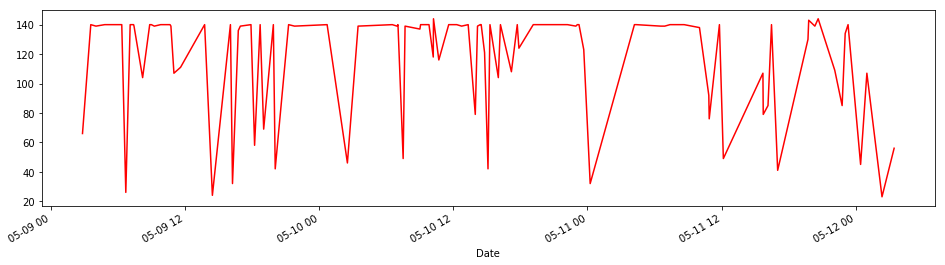

In [42]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

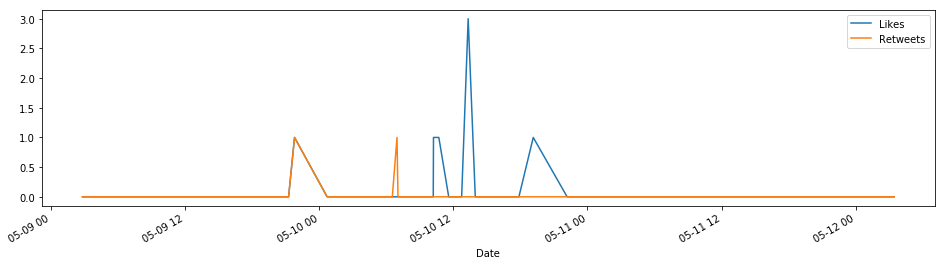

In [43]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [44]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter for iPhone
* Twitter Web Client
* Twitter Web App
* TweetDeck


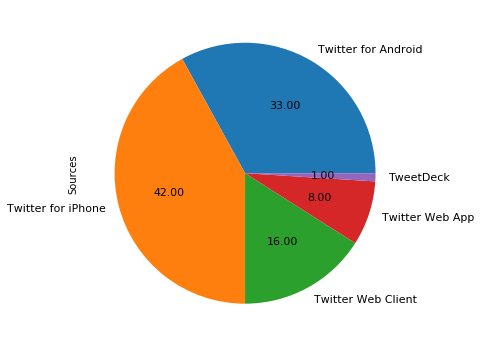

In [45]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [46]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [47]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@EmiratesSupport intend to sponsor any club in Brazil?,56,1127414614512345088,2019-05-12 03:26:05,Twitter for Android,0,0,0
1,@EmiratesSupport Done x,23,1127398228427718656,2019-05-12 02:20:58,Twitter for Android,0,0,0
2,@EmiratesSupport Am humbled and Honoured big time.\nThank u once again. Great memories to carry all the way.,107,1127377799961108480,2019-05-12 00:59:47,Twitter for Android,0,0,1
3,@EmiratesSupport \nCan I accumulate JAL miles?,45,1127369332931973121,2019-05-12 00:26:09,Twitter for iPhone,0,0,0
4,@EmiratesFACup @EmiratesSupport hello guys. I've submitted a bid to trade all my skyward miles for tickets to the c… https://t.co/ePi9ZIfZm4,140,1127352394075996160,2019-05-11 23:18:50,Twitter for Android,0,0,0
5,"@EmiratesSupport i just paid ticket , but I did not get reservation number so i can not find my schedule. please check and let me know",134,1127348512704720896,2019-05-11 23:03:25,Twitter Web Client,0,0,0
6,@EmiratesSupport Finally I have reached but my bag hasn’t reached . Next pain started,85,1127344392233054208,2019-05-11 22:47:02,Twitter for iPhone,0,0,0
7,@EmiratesSupport This doesn't work when I use it\n Please provide an email address for me to log my complaint.,109,1127334428139610112,2019-05-11 22:07:27,Twitter for Android,0,0,-1
8,"It’s not even about the delay, poor information &amp; the mid-advise of the cost now. It’s the fact that nobody is read… https://t.co/OOfZIRfHE3",144,1127312021081530369,2019-05-11 20:38:24,Twitter for iPhone,0,0,-1
9,@EmiratesSupport Can’t wait for the return trip and hope to experience your business class one day... if economy class is that amazing! :-),139,1127307558186827777,2019-05-11 20:20:40,Twitter for iPhone,0,0,1


In [48]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [49]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 32.0%
Percentage of neutral tweets: 45.0%
Percentage de negative tweets: 23.0%
